# Suport Vector Machine

El algoritmo de Supor Vector Machines es un algoritmo de apredizaje supervisado que se puede utilizar para clasificar o para problemas de regresión. El ejemplo mas sencillo de clasificación, dados una serie de puntos que pertenecen a distintas clases el objetivo es encontrar dado un nuevo punto cuando estará en uno de los dos bandos. La solución mas simple es pensar que el punto se trata de un vector en un plano *p* dimensional, y separarlos por un hyperplano de *p-1* dimensiones.

La elección del mejor hiperplano es aquel que nos de el mayor margen posible entre dos clases. Nadie ha dicho que el hiperplano a fuerzas tenga que existir. En el caso de que este hiperplano **existiera** se le conoce como **hiperplano maximizador del margen**. Y en el caso de la clasificación lineal se le denomina **el clasificador de maximización de los margenes**. 

En el caso de que exista una separabilidad lineal, cualquier punto x que este en el hiperplano separador satisface la ecuación:

$$
x^tw + b = 0 
$$

Esta operación cuando los planos son perpendiculares. entonces cualquier punto dentro del hiperplano, va a cumplir esta ecuación donde "w" es el vector normal al hiperplano y "d" es una constante que nos describe como ese plano ésta desplazado con respecto al orígen. 

$$
x \in H, w ⊥ H, d(0, H) = \frac{b}{||w||}
$$

<img src="https://www.researchgate.net/publication/344827087/figure/fig1/AS:949602446503937@1603414274693/Support-Vector-Machine-Mechanism.png" />


Una vez que tuvieramos el hiperplano definido, el problema es encontrar el parametro $w$ y $d$. Pero ¿que pasa si dibujamos hiperplanos paralelos en los dos lados de la región de desición.

En ese caso tendra la forma de un corredor, donde la región de desición será la linea central y se pintan lineal paralelas a la linea de desición.

La lineas paralelas se restringen a los dos puntos mas cercanos a la fontera de las rectas de ese canal. Estos planos aseguran que todos los puntos que esten por encima de una distancia y abajo $d$ de una frontera éstan en regiones separadas. La región del canal se puede representar como:

$$
\begin{cases}
x^T_i w + b \geq +a | y_i = +1\\
x^T_i w + b \geq -a | y_i = -1
\end{cases}
$$

$$
y_i(x^T_iw + b) \geq a
$$

$$
M = d_+ + d_- = \frac{2a}{||w||}
$$

Por comodidad en vez de jugar con tantos parámetros se fija la $a=1$ para maximizar el margén en general, no es convexa y se intenta en lugar de maximizar la anchura de la carretera, minimizar lo que ésta abajo en el denominador. 

El objetivo para un problema de $n$ puntos, es resolver una ecuación dado por:

$$
\begin{align}
max(M)\\
\text{S.A  } y_i(x^T_iw+b)\geq M, \forall_i = 1, ..., n
\end{align}
$$

Remplanteado como un problema de minización sería:

$$
\begin{align}
&min &f(w) = \frac{1}{2} ||w||^2 \\
&\text{S.A} &g(w, b) = -y_i(x^T_iw+b) + 1 \leq 0, \forall_i = 1, ..., n
\end{align}
$$

En la mayoria de casos el separador no va a existir y no habra un maximizador que maximize las metricas y habrá que buscar otro maximizador. 


## El problema de classificación no optimo

Se replantea el problema del plano separador para pensar un plano que casi separe las clases con lo que vamos a llamar un margen de generalización. A esto se le conoce como el problema de support vector classifier. La forma de resolverlo es partiendo de la premisa que: Los puntos se van a sobreponer y habra un overlapping sobre los puntos que hay en el dataset.

Es decir, dentro del corredor puede haber puntos que no esten claramente separados. una estrategia es maximizar "m" o el margen y permitir que algunos puntos esten de lado equivocado del margen. Para ello lo que hacemos es definir algunas variables adicionales llamadas vectores, o llamadas soporte vectorial. 

El valor de C se fija de modo que los errores se queden acotados de algun modo, una buena opción es que sea un valor grande. 

## El truco del kernel

El SVM que hemos descrito solo encuenta fronteras lineales, al igual que otros métodos lineales, se puede proceder de un modo mas flexible intentando alargar la cantidad de datos que utilizamos y tambien utlizando expansiones del algoritmo. De forma general las fronteras se pueden intentar definir en otro espacio vectorial utilizando otra base que clasifique o separe mejor el conjunto de entrenamiento y sus bases. Eso se traduce en fronteras no necesariamente lineales.

La manera de proceder es similar. El método se basa en encontrar los puntos que son parte del soporte, llevando a cabo la menor cantidad de calculos posible encontrar el minimo conjunto de punto que separan las clases en el conjunto de entrenamiento.

Los nucleos son lo mismo que las convoluciones, esto nos va a dar la capacidad de llevar a cabo productos internos y con eso nos será suficiente, en lugar de utilizar transformaciones lineales lo podremos resolver con cualquier tipo de transformación lineal o no lineal. Para poder resolver el problema dual que salia del problema de programación lineal cuadraticó, hay una restricción y es que el kernel debe venir dado por una matriz semi definida positiva.

$$
\text{Kernel :} K(x, y) = <h(x), h(y)>
$$

$$
\begin{cases}
\text{polinomial} &K(x, y) = (1+<x, y>)^d \\
\text{radial} &K(x, y) = e^{-\gamma ||x-y||^2} \\
\text{red neuronal} &K(x, y) = tanh(k_1<x,y> + k_2)
\end{cases}
$$

Una separacion será posible en caso de tener un espacio de muchas dimensiones, un valor grande de $C$ nos va a permitir casi cualquier valor sea positivo, las restricciones van a ser muy rigidas. y un valor pequeño de $C$ nos va a permitir que la frontera sea suave pero a costa que nuchos de los puntos se conviertan en vectores de soporte, por lo tanto, la $C$ será el valor clave al usar SVM.

- **p** Predictores
- **M** Soportes vectoriales
- **u** Muestras para entrenar

Número de operaciones:
$$
M^3+Mn+npM \\
M << n \rightarrow \text{Lineal en n} \\
M~n \rightarrow O(M^3)
$$

Una buena elección de Kernel es la que trabajara con mucha separación en las clases y usara pocos soportes vectoriales. 

## Linear Supor Vector Machine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn import svm

In [2]:
X = [1,5,1.5,8,1,9]
Y = [2,8,1.8,8,0.6,11]

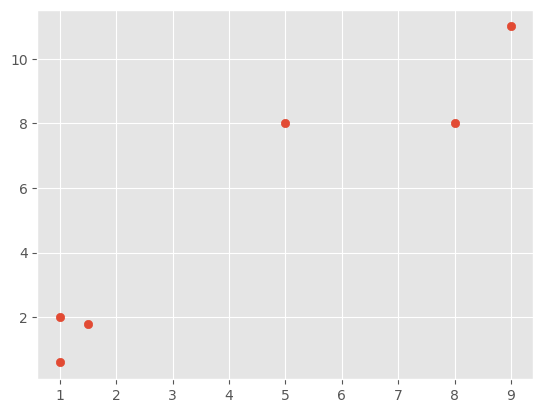

In [3]:
plt.scatter(X,Y)
plt.show()

In [4]:
data = np.array(list(zip(X, Y)))
target = [0, 1, 0, 1, 0, 1]

classifier = svm.SVC(kernel='linear', C=1.0)

classifier.fit(data, target)

SVC(kernel='linear')

In [5]:
classifier.score(data, target)

1.0

[]

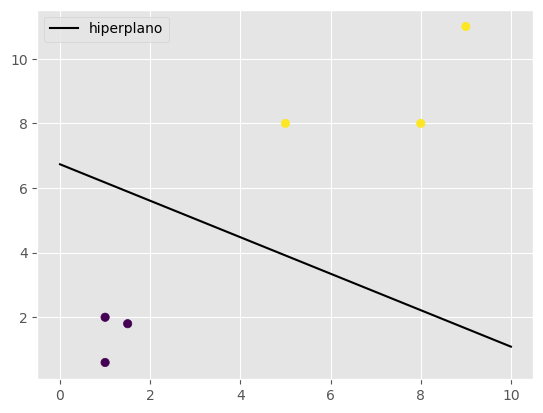

In [6]:
# Representación 
w = classifier.coef_[0]
a = -w[0] / w[1] # Pendiente
b = -classifier.intercept_[0]/w[1]
xx = np.linspace(0, 10)
yy = a * xx + b

plt.plot(xx, yy, 'k-', label='hiperplano')
plt.scatter(X, Y, c=target)
plt.legend()
plt.plot()

In [7]:

classifier.support_vectors_

array([[1.5, 1.8],
       [5. , 8. ]])

In [8]:
# Problema de separación 
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.datasets._samples_generator import make_blobs

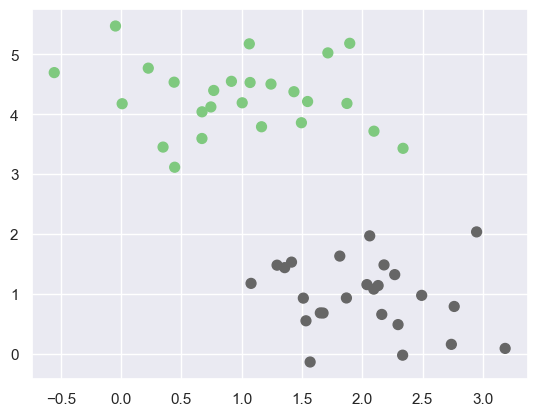

In [9]:
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)

plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="Accent")

In [10]:
model = svm.SVC(kernel='linear', C=1e10)
model.fit(X, Y)



SVC(C=10000000000.0, kernel='linear')

In [11]:
def plot_svc(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    ## Generamos el mesh de evaluación
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)

    Y, X = np.meshgrid(yy, xx)

    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # representamos las fronteras y margenes del SVC
    ax.contour(X, Y, P, colors='k', levels=[-1,0,1], alpha=.5, linestyles=["--", "-", "--"])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='black')
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

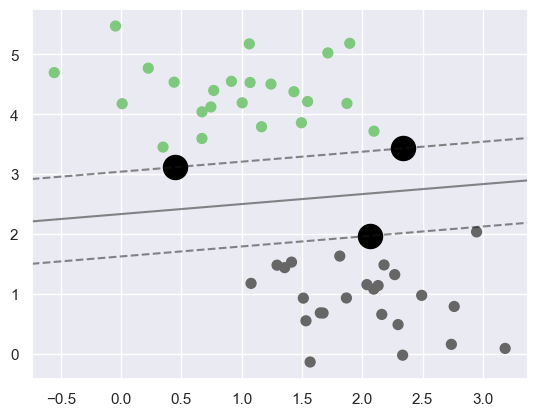

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="Accent")
plot_svc(model, plot_support=True)

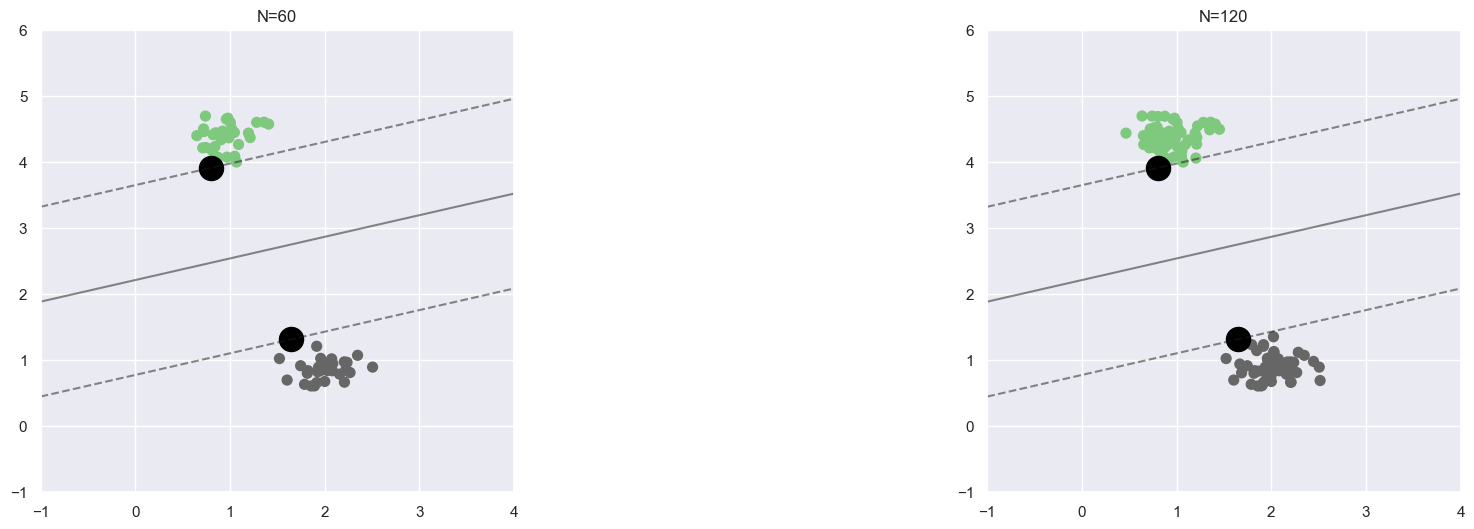

In [13]:
def plot_svm(N=10, ax=None):
    X, Y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.2)

    X = X[:N]
    Y = Y[:N]

    model = svm.SVC(kernel='linear', C=1e10)

    model.fit(X, Y)

    ax = ax or plt.gca()

    ax.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="Accent")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)

    plot_svc(model, ax=ax)

fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=.95, wspace= 1.0)

for ax_i, N in zip(ax, [60, 120]):
    plot_svm(N, ax_i)
    ax_i.set_title(f"N={N}")

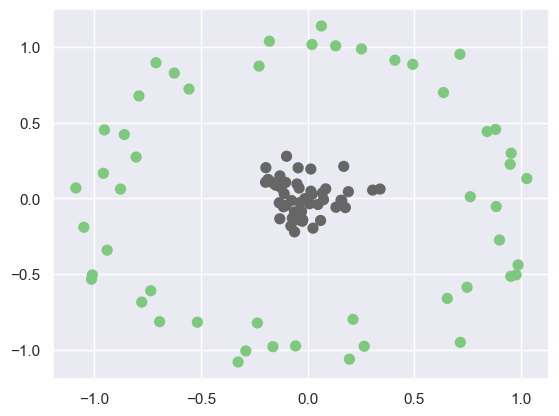

In [14]:
from sklearn.datasets._samples_generator import make_circles

X, Y = make_circles(100, noise=0.1, factor=0.1)

plt.scatter(X[:,0], X[:, 1], c=Y, s=50, cmap="Accent")


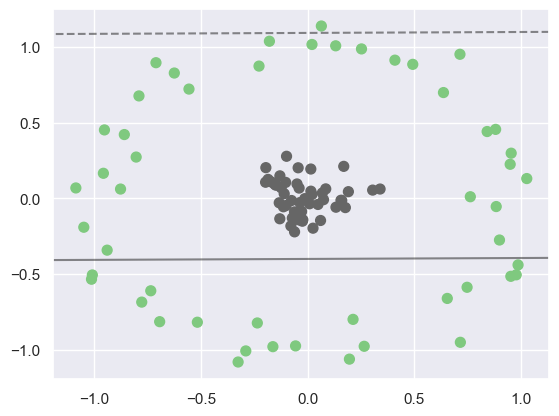

In [15]:
model = svm.SVC(kernel='linear')
model.fit(X, Y)
plt.scatter(X[:,0], X[:, 1], c=Y, s=50, cmap="Accent")

plot_svc(model, plot_support=False)

In [16]:
# Aumentar la complejidad del problema
r = np.exp(-(X**2).sum(1)) # Alturas de los puntos

from mpl_toolkits import mplot3d

In [19]:
def plot_3D(elev=30, azim=30, X=X, Y=X, r=r):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0], X[:,1], r, c=Y, s=50, cmap="Accent")
    ax.view_init(elev=elev, azim=azim)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

In [21]:
from ipywidgets import interact, fixed

interact(plot_3D, elev=list(range(0, 360, 30)), azim=list(range(0, 360, 30)), X=fixed(X), Y=fixed(Y), r = fixed(r))

interactive(children=(Dropdown(description='elev', index=1, options=(0, 30, 60, 90, 120, 150, 180, 210, 240, 2…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.14866104,  0.08611591],
       [-0.07571859, -0.01487316],
       [ 0.21272746, -0.80058633],
       [ 0.06412068,  1.13879473],
       [-0.8774653 ,  0.06092006],
       [-0.02263075, -0.14249182],
       [ 0.9526007 , -0.51594331],
       [ 0.08469276,  0.06204119],
       [-0.85975355,  0.42117287],
       [-0.01346101, -0.00259728],
       [-0.32616818, -1.08248702],
       [-0.13335186, -0.02988297],
       [ 0.95422491,  0.29800069],
       [-0.03953845, -0.14209092],
       [-0.71130396,  0.89614687],
       [ 0.19579412, -1.06351328],
       [ 0.49275914,  0.88534207],
       [-0.04021977,  0.06731039],
       [-0.06152917, -0.22207413],
       [-0.17944784,  1.03820956],
       [-0.69400528, -0.81588589],
       [ 0.17667147, -0.06169546],
       [-0.80423473,  0.27241754],
       [ 0.65461213, -0.6621976 ],
       [-1.04970316, -0.19153085],
       [-1.08696027,  0.06820026],
       [ 0.04823254, -0.04092138],
       [

In [22]:
clf = svm.SVC(kernel='rbf', C=1e6)

clf.fit(X, Y)

SVC(C=1000000.0)

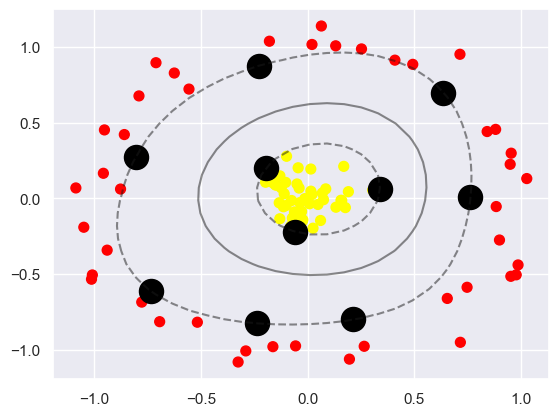

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
plot_svc(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none')

In [29]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)

In [30]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


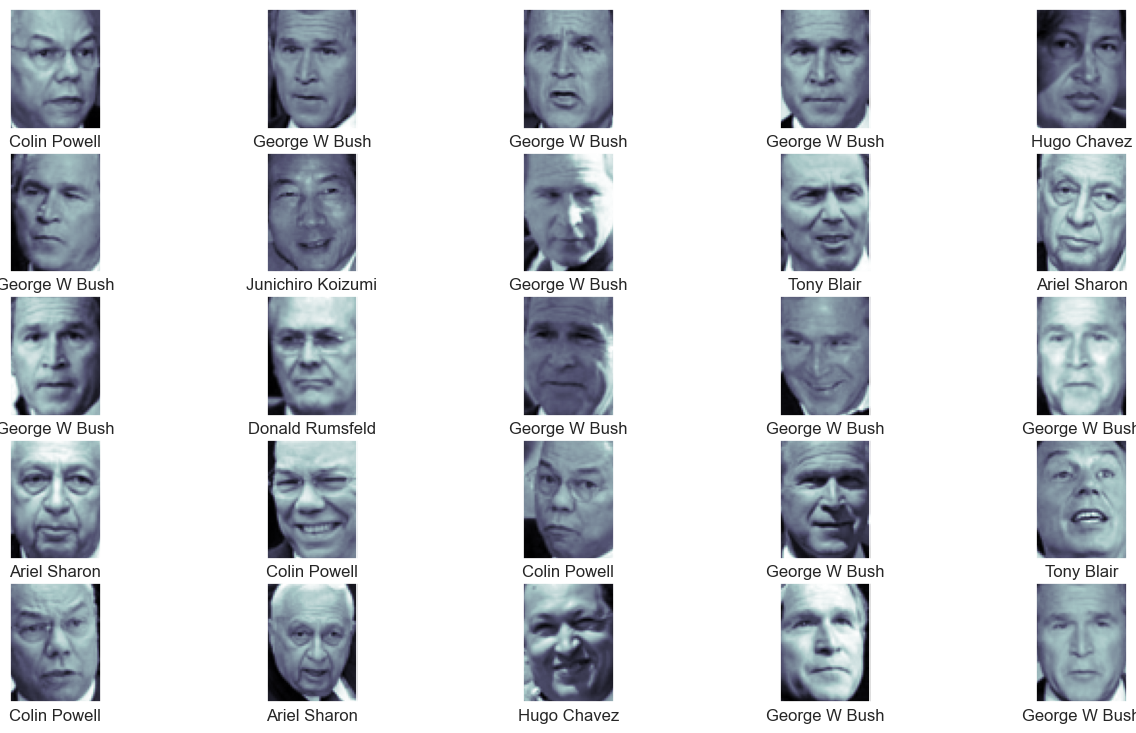

In [33]:
fig, ax = plt.subplots(5, 5, figsize=(16, 9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap='bone')
    ax_i.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [36]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = svm.SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)

from sklearn.model_selection import GridSearchCV

param_grid = {
    "svc__C": [0.1,1,5.10,50],
    "svc__gamma":[0.0001,0.0005,0.001,0.005,0.01]
}

grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, y_train)

CPU times: total: 48.5 s
Wall time: 23 s


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [0.1, 1, 5.1, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]})

In [37]:
print(grid.best_params_)

{'svc__C': 5.1, 'svc__gamma': 0.001}


In [38]:
classifier = grid.best_estimator_
yfit = classifier.predict(X_test)

Text(0.5, 0.98, 'predicciones de las imagenes')

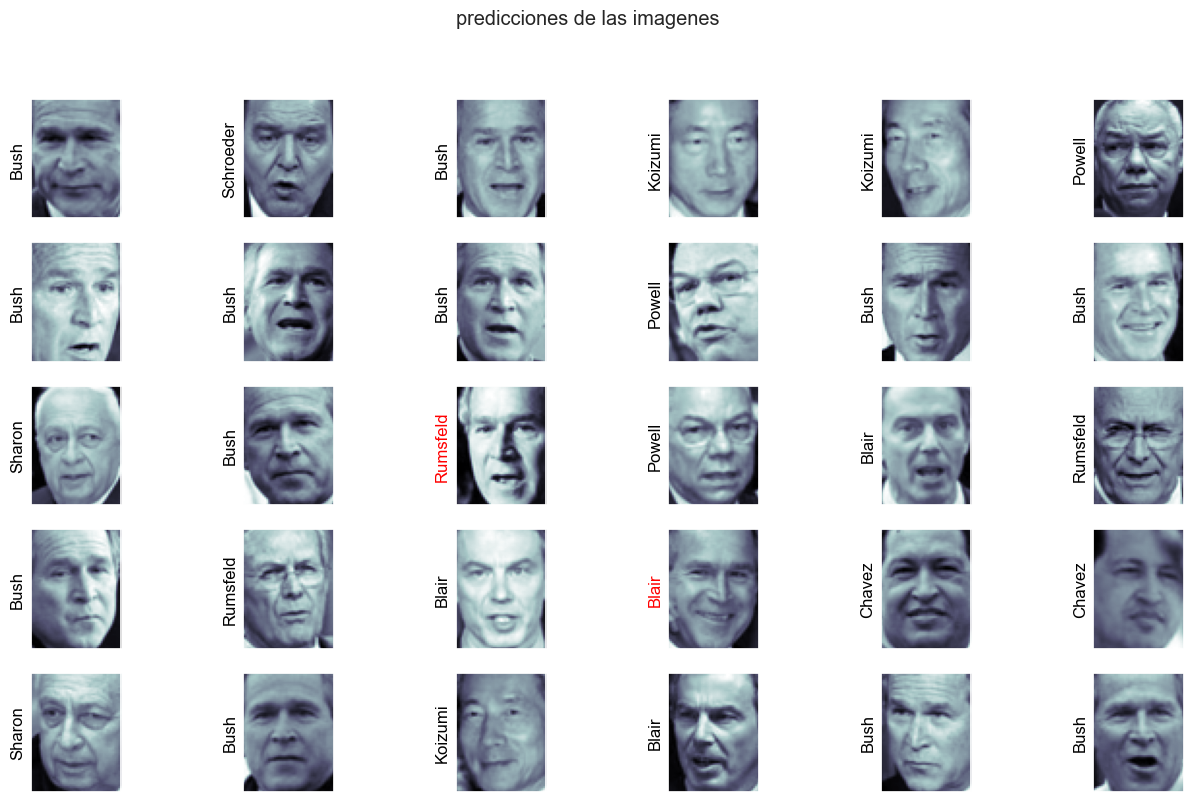

In [42]:
fig, ax = plt.subplots(5, 6, figsize=(16, 9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(X_test[i].reshape(62, 47), cmap='bone')
    ax_i.set(xticks=[], yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == y_test[i] else 'red')
fig.suptitle("predicciones de las imagenes")

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



In [48]:
from sklearn import datasets

iris = datasets.load_iris()

In [55]:
X = iris.data[:, :2]
Y = iris.target

In [58]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

h = (x_max - x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X_plot = np.c_[xx.ravel(), yy.ravel()]

In [60]:
C = 1
svc = svm.SVC(kernel='linear', C=C, decision_function_shape='ovr').fit(X, Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)


Text(0.5, 1.0, 'SVC para las flores de Iris')

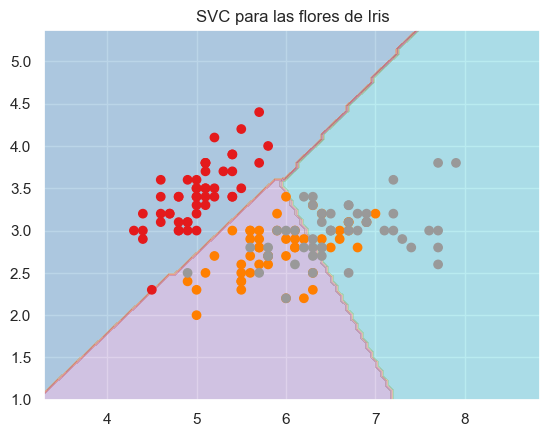

In [64]:
plt.Figure(figsize=(15, 5))
plt.contourf(xx, yy, Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Set1)
plt.title("SVC para las flores de Iris")

In [65]:
C = 1.0
svc = svm.SVC(kernel='rbf', C=C, decision_function_shape='ovr').fit(X, Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris')

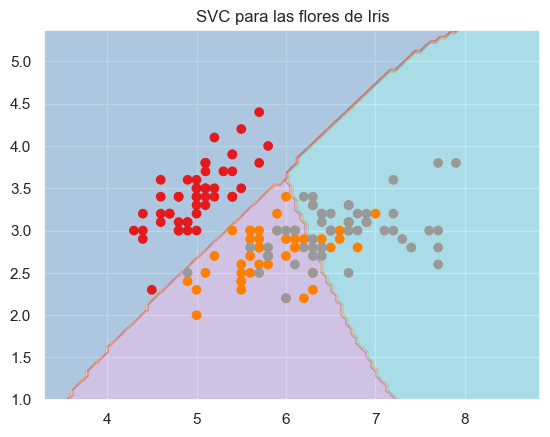

In [66]:
plt.Figure(figsize=(15, 5))
plt.contourf(xx, yy, Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Set1)
plt.title("SVC para las flores de Iris")

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [77]:
X, Y = shuffle(X, Y, random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=0)

parameters = [
    {
        'kernel': ['rbf'],
        'gamma': [1e-4, 1e-3, 1e-2, .1, .2, .5],
        'C': [1,10,100,1000]
    },
    
    {
        'kernel': ['linear'],
        'C': [1,10,100,1000],
    }
]

clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters, cv=5)
clf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [78]:
clf.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [79]:
y_pred = clf.predict(X_test)
print(classification_report(Y_test, y_pred, target_names=['setosa', 'versicolor', 'virginica']))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.91      0.71      0.80        14
   virginica       0.75      0.92      0.83        13

    accuracy                           0.87        38
   macro avg       0.89      0.88      0.88        38
weighted avg       0.88      0.87      0.87        38

